# Transformando Problemas em Oportunidades: Como resolvi um Desafio de Ciência de Dados no Kaggle

Esse problema foi proposto pelo meu orientador de iniciação ciêntifica para que possamos enternder um pouco mais sobre ciência de dados aprendizado de maquina.

Para essa solução usarei a metodologia CRISP-DM.
Por que essa metodologia?.
* Organização.
* Planeijamento.
* Independe do tipo de projeto.
## Etapas da metodologia.
1. Etapa - **Entendimento do negócio**.
* Objetivos do projéto.
* Critérios de sucesso.
* Recursos e contingenciamentos.
* Objetivos do data mining.
* Planeijamento estrutural.
2. Etapa - **Entendimento dos dados**.
* Coleta.
* Descrição.
* Exploração.
* Verificação da qualidade dos dados.
3. Etapa - **Preparação dos dados**.
* Seleção.
* Limpeza.
* Construção.
* Integração.
* Formatação.
4. Etapa - **Modelagem**.
* Escolha a tecnica de modelagem.
* Design de teste.
* Construção do modelo.
* Avaliação.
5. Etapa - **Revisão dos resultados**.
* Revisão dos critérios de sucesso.
* Revião do processo completo.
* Determinação de proximos passos.

lembrando que como os dados são disponibilizados pelo kaggle algumas estapas iniciais não são nessesárias e esse processo e iterátivo.

### planejamento.
* Aprender e empregar os conceitos de ciência de dados e estatistica aplicada em um problema real.
* Atingir uma pontuação >= 90pts no kaggle.
* Identificar padroes ou relações que possam ajudar a melhorar o desempenho.


### Entendimento dos dados.
Visão geral.

Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como “verdade básica”) para cada passageiro. Seu modelo será baseado em “características” como gênero e classe dos passageiros. Você também pode usar a engenharia de recursos para criar novos recursos.

O conjunto de teste deve ser usado para ver o desempenho do seu modelo em dados não vistos. Para o conjunto de teste, não fornecemos a verdade básica para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de teste, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic.

Também incluímos gender_submission.csv , um conjunto de previsões que assumem que todas e apenas as passageiras sobrevivem, como um exemplo de como deve ser um arquivo de envio.

retirado de [kaggle.com](https://www.kaggle.com/competitions/titanic/data)

In [141]:
# As bibliotecas que usaremos

import pandas as PD
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

%matplotlib inline

* Dicionário dos dados.

| Variável | Definição | Código |
|---|---|---|
| Survived | Sobrevivel ou não | 1 -> sim, 0 -> Não |
| Pclass | Classe do ingresso | 1 = 1º, 2 = 2º, 3 = 3º |
| Sex | sexo do tripulante | male ou female |
| Age | Idade em anos | |
| SigSp | Numero de irmãos ou conjuge a bordo | |
| Parch | Numero de pais ou filhos a bordo | |
| Ticket | Numero do bilhete | |
| Fare | Tafira do bilhete | |
| Embarked | Porto de embarcação | C = Cherbourg, Q = Queenstown, S = Southampton |


In [142]:
# abrindo os dados de treino e teste disponibilizados pelo kaggle

data_training = PD.read_csv("train.csv", sep=',', low_memory=False)
data_test = PD.read_csv("test.csv", sep=',', low_memory=False)

data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [143]:
# gerando relatório para melhor visualização dos dados
import ydata_profiling

try:
    # se o arguivo já existe não faz nada
    os.path.isfile('relatorio_train.html')

except:
    # se não existe o cria
    profile_Normal = ydata_profiling.ProfileReport(data_training, minimal=True)
    profile_Normal.to_file("relatorio_train.html")

In [144]:
# Visualizando a cardinalidade dos dados.
data_training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


* Analizando qualidade dos dados podemos perceber que temos dados faltantes nas colunas Age, Cabin e Embarked.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

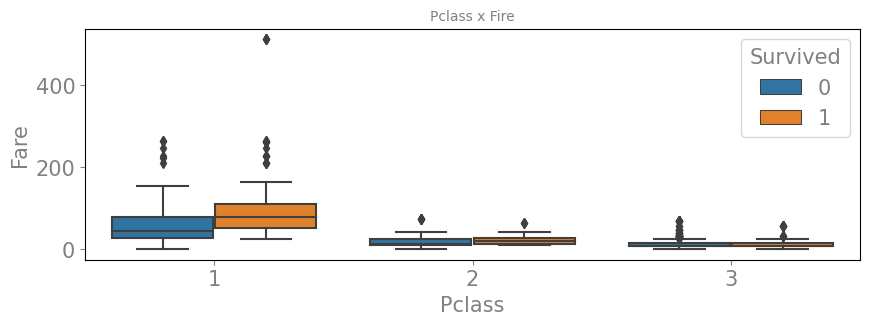

In [145]:
fig, ax = plt.subplots(figsize=(10,3))

sns.boxplot(data=data_training, x='Pclass', y='Fare', hue='Survived')

ax.set_title('Pclass x Fire', fontsize=10)
plt.show()

In [146]:
# taxa de sobreviventes por classe.
data_training.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [147]:
# min, media e max do valor da tarifa por sobreviventes
data_training.groupby(['Pclass', 'Survived'])['Fare'].agg(['min', 'mean', 'max'])

min       mean       max
Pclass Survived                              
1      0          0.0000  64.684007  263.0000
       1         25.9292  95.608029  512.3292
2      0          0.0000  19.412328   73.5000
       1         10.5000  22.055700   65.0000
3      0          0.0000  13.669364   69.5500
       1          0.0000  13.694887   56.4958

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

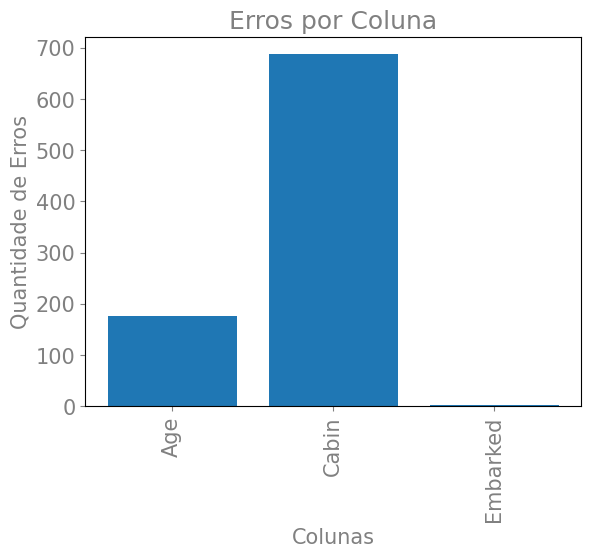

In [148]:
# Dados da variável data_col_erros
data_col_erros = data_training.isna().sum()

data_col_erros = data_col_erros[data_col_erros > 0]

# Obtendo os nomes das colunas
colunas = data_col_erros.index.tolist()

# Obtendo os valores dos erros
erros = data_col_erros.values.tolist()

# Plotando o gráfico de barras
plt.bar(colunas, erros)

# Adicionando rótulos aos eixos x e y
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Erros')

# Adicionando um título ao gráfico
plt.title('Erros por Coluna')

# Rotacionando os rótulos do eixo x para facilitar a leitura
plt.xticks(rotation=90)

# Exibindo o gráfico
plt.show()

In [149]:
# Quantidade de pessoas por sexo

quant_sex = PD.DataFrame(data_training['Sex'].value_counts())
quant_sex['Sex em %'] = (quant_sex / (quant_sex.Sex.sum()) *100).round(2)
quant_sex['Nº Sobreviventes por Sexo']= data_training.groupby('Sex')['Survived'].sum()
quant_sex['Taxa de Sobreviventes por Sexo em %'] = (quant_sex['Nº Sobreviventes por Sexo'] / quant_sex['Sex'] * 100).round(2)

quant_sex

,Sex,Sex em %,Nº Sobreviventes por Sexo,Taxa de Sobreviventes por Sexo em %
male,577,64.76,109,18.89
female,314,35.24,233,74.20


In [150]:
# quantidade de sobreviventes por classe

quant_pclass = PD.DataFrame(data_training['Pclass'].value_counts())
quant_pclass['Pclass em %'] = (quant_pclass / (quant_pclass['Pclass'].sum()) * 100).round(2)
quant_pclass['Nº Sobreviventes por Pclasse'] = data_training.groupby('Pclass')['Survived'].sum()
quant_pclass['Taxa de sobreviventes por Pclass %'] = (quant_pclass['Nº Sobreviventes por Pclasse'] / quant_pclass['Pclass'] * 100).round(2)

quant_pclass

,Pclass,Pclass em %,Nº Sobreviventes por Pclasse,Taxa de sobreviventes por Pclass %
3,491,55.11,119,24.24
1,216,24.24,136,62.96
2,184,20.65,87,47.28


In [151]:
data_training[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [152]:
data_training[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [153]:

data_training['FamiliSize'] = (data_training['SibSp'] + data_training['Parch'])
data_test['FamiliSize'] = (data_test['SibSp'] + data_test['Parch'])

data_training[["FamiliSize", "Survived"]].groupby(['FamiliSize']).mean().sort_values(by='FamiliSize', ascending=False)

data_training = data_training.drop(columns=['SibSp', 'Parch'])
data_test = data_test.drop(columns=['SibSp', 'Parch'])

# quantidade de sobreviventes por tamanho da familia

quant_familySize = PD.DataFrame(data_training['FamiliSize'].value_counts())
quant_familySize['FamiliSize em %'] = (quant_familySize / (quant_familySize['FamiliSize'].sum()) * 100).round(2)
quant_familySize['Nº Sobreviventes por FamiliSize'] = data_training.groupby('FamiliSize')['Survived'].sum()
quant_familySize['Taxa de sobreviventes por FamiliSize %'] = (quant_familySize['Nº Sobreviventes por FamiliSize'] / quant_familySize['FamiliSize'] * 100).round(2)

quant_familySize

,FamiliSize,FamiliSize em %,Nº Sobreviventes por FamiliSize,Taxa de sobreviventes por FamiliSize %
0,537,60.27,163,30.35
1,161,18.07,89,55.28
2,102,11.45,59,57.84
3,29,3.25,21,72.41
5,22,2.47,3,13.64
4,15,1.68,3,20.00
6,12,1.35,4,33.33
10,7,0.79,0,0.00
7,6,0.67,0,0.00


In [154]:

#definindo os dados que aparecerão no gráfico

labelss = ['Não Sobreviventes', "Sobreviventes"] 

contagem = PD.cut(x=data_training['Survived'], bins=2,labels= labelss, include_lowest=True).value_counts() #nº de sobreviventes

taxa_de_sobreviventes = (PD.value_counts(PD.cut(x=data_training['Survived'], bins=2,labels= labelss, 
                                                include_lowest=True),normalize=True) * 100).round(1) #taxa de Sobreviventes
quant_sobrevi = PD.DataFrame({"Contagem":contagem, 
                              'Taxa de Sobrevivência(%)':taxa_de_sobreviventes}) #criando um DataFrame para facilitar a visualização dos dados
                              
quant_sobrevi

,Contagem,Taxa de Sobrevivência(%)
Não Sobreviventes,549,61.6
Sobreviventes,342,38.4


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

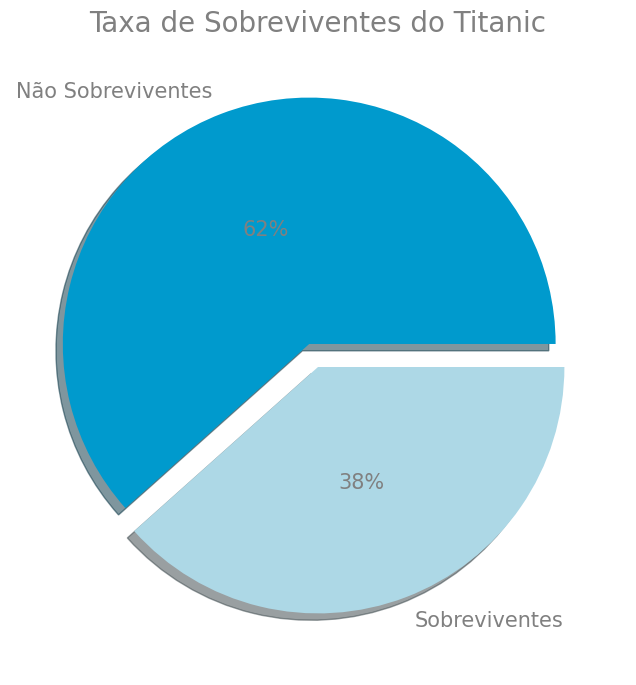

In [155]:
plt.figure(figsize=(10,8))

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor']= 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['font.size']=15

cores= ['#009ACD', '#ADD8E6']
percentages = list(quant_sobrevi['Taxa de Sobrevivência(%)'])
explode=(0.1,0)

plt.pie(percentages, explode=explode, 
       labels=labelss,
       colors = cores,
       autopct='%1.0f%%',
       shadow=True, startangle=0,   
       pctdistance=0.5,labeldistance=1.1
    )

plt.title("Taxa de Sobreviventes do Titanic", fontsize=20, pad=20)

plt.show()

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

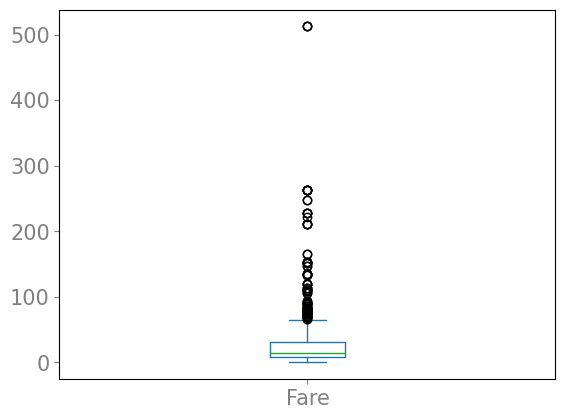

In [156]:
# analizano outliers no valor da passagem

data_training['Fare'].plot.box()

### Conclusões da analise eploratória:
* Mulheres, crianças, e pessoal de classe alta tem a maior probabilidade de sobreviver.
* Temos 3 colunas com dados faltantes e elas precisão ser tratadas levando em conta os principais fatores de sobrevivencia descritos anteriormente.

## 3 - Etapa de preparação dos dados.
### 3.1 Limpeza dos dados.
* a coluna idade possui valores faltantes e como cada classe social e sexo possui valores diferentes para a media da idade vamos completar usando essa regra.

In [157]:
data_training['Age'] = data_training['Age'].fillna(data_training.groupby(['Pclass','Sex'])['Age'].transform('median'))
data_test['Age'] = data_test['Age'].fillna(data_test.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

data_training.Age.describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [158]:
# Um valor da coluna fire dos dados de teste esta com valor nan então vamos subistiruir pela media 
# levando em conta a classe social e sexo
data_test['Fare'] = data_test['Fare'].fillna(data_test.groupby(['Pclass','Sex'])['Fare'].transform('median'))

data_test['Fare'].describe()

count    418.000000
mean      35.560845
std       55.856972
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

* Agora umas colunas que são do tipo String que transformaremos em uma representação numerica para se enquadrar no nosso algoritmo de classificação.

In [159]:
## Substituir os valores na coluna 'Sex' 0 para macho e 1 para female
data_training['Sex'] = data_training['Sex'].map({'male': 0, 'female': 1})
data_test['Sex'] = data_test['Sex'].map({'male':0,'female':1})

# Verificar os valores únicos na coluna 'Sex' se a troca realmente aconteceu
unique_values_traning = data_training['Sex'].unique()
unique_values_test = data_test['Sex'].unique()

# Trocar o tipo da coluna 'Sex' para int
data_training['Sex'] = data_training['Sex'].astype(int)
data_test['Sex'] = data_test['Sex'].astype(int)

data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamiliSize       int64
dtype: object

* pegaremos as colunas que não são do tipo numerico que possuem muitos valores diferentes e buscaremos uma forma de representa-las em valores numéricos.
* já as que possuem valores distintos podem confundir noddo modelo então deixaremos assim.

In [160]:
# obtendo as colunas que 
data_training.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             89
FamiliSize       9
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

* Antes de antes de mudar a coluna para uma representação numética vamos preencaher alguns dados faltantes para que nossos dados de treinamento fique o mais completo possivel.

In [161]:
# obtendo a moda da coluna
mode_embarked_train = str(data_training['Embarked'].mode())
mode_embarked_test = str(data_test['Embarked'].mode())

#preenchendo os nullos pela moda
data_training['Embarked'] = data_training['Embarked'].fillna(value=mode_embarked_train)
data_test['Embarked'] = data_test['Embarked'].fillna(value=mode_embarked_test)

#visualizando os nullos e os tipos.
data_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamiliSize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0


* Agora com auxilio do OndeHotEncoder valos representar os valores da coluna embarked para numerico ou seja dentro das três possibilidades S (Southampton), C (Cherbourg) e Q (Queenstown) onde tiver o valor 1 indica o local de embarque do passageiro.

In [162]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Codificação one-hot da coluna 'Embarked' no DataFrame de treinamento
encoder = OneHotEncoder()
embarked_encoded_train = pd.DataFrame(encoder.fit_transform(data_training[['Embarked']]).toarray(), columns=encoder.categories_[0].tolist())

# Codificação one-hot da coluna 'Embarked' no DataFrame de teste
embarked_encoded_test = pd.DataFrame(encoder.transform(data_test[['Embarked']]).toarray(), columns=encoder.categories_[0].tolist())

# Removendo a coluna 'Embarked'
data_training = data_training.drop(columns=['Embarked'])
data_test = data_test.drop(columns=['Embarked'])

#removando coluna extra que gerou
subset_train = embarked_encoded_train.loc[:, ['C', 'Q', 'S']]
subset_test = embarked_encoded_test.loc[:, ['C', 'Q', 'S']]

# Concatenando o DataFrame original com a nova coluna codificada
# data_training = pd.concat([data_training, subset_train], axis=1)
# data_test = pd.concat([data_test, subset_test], axis=1)

data_training = data_training.join(subset_train)
data_test = data_test.join(subset_test)

data_training


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamiliSize,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,1,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,1,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,1,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.0000,NaN,0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.0000,B42,0,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.5,W./C. 6607,23.4500,NaN,3,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.0000,C148,0,1.0,0.0,0.0


In [163]:
data_training['Title'] = data_training['Name'].str.extract(r'(\b\w+\.)')
data_training['Title'] = data_training['Title'].fillna(value='Other')

data_test['Title'] = data_test['Name'].str.extract(r'(\b\w+\.)')
data_test['Title'] = data_test['Title'].fillna(value='Other')

data_training

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamiliSize,C,Q,S,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,1,0.0,0.0,1.0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,1,1.0,0.0,0.0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,0,0.0,0.0,1.0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,1,0.0,0.0,1.0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,0,0.0,0.0,1.0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.0000,NaN,0,0.0,0.0,1.0,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.0000,B42,0,0.0,0.0,1.0,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.5,W./C. 6607,23.4500,NaN,3,0.0,0.0,1.0,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.0000,C148,0,1.0,0.0,0.0,Mr.


Os títulos mencionados acima são usados em nomes de americanos e têm diferentes significados e usos. Aqui está uma explicação de cada um deles:

- Mr.: É uma abreviação de "Mister" e é usado como uma forma educada de tratar um homem adulto.

- Mrs.: É uma abreviação de "Missus" e é usado como uma forma educada de tratar uma mulher adulta que é casada.

- Miss: É usado como uma forma educada de tratar uma mulher solteira ou uma menina jovem.

- Master: É usado como uma forma educada de tratar um menino jovem.

- Don: É um título honorífico em espanhol e é usado para tratar um homem de alto status ou prestígio social.

- Rev.: É uma abreviação de "Reverend" e é usado como um título para clérigos, como padres, pastores ou ministros religiosos.

- Dr.: É uma abreviação de "Doctor" e é usado como um título para profissionais com um grau de doutorado, como médicos, dentistas, professores universitários, etc.

- Mme.: É uma abreviação de "Madame" e é usada como uma forma educada de tratar uma mulher adulta em francês.

- Ms.: É uma forma neutra de tratamento que pode ser usada para mulheres adultas, independentemente do estado civil. Pode ser usada quando o estado civil da mulher é desconhecido ou irrelevante.

- Major: É um título militar usado para um oficial de alta patente.

- Lady: É usado como um título honorífico para mulheres de alta posição social, como nobres ou esposas de nobres.

- Sir: É usado como um título honorífico para homens de alta posição social, como nobres.

- Mlle.: É uma abreviação de "Mademoiselle" e é usada como uma forma educada de tratar uma mulher solteira em francês.

- Col.: É uma abreviação de "Colonel" e é usado como um título militar para um oficial de alta patente.

- Capt.: É uma abreviação de "Captain" e é usado como um título militar para um oficial de patente intermediária.

- Countess: É usado como um título honorífico para mulheres que possuem o título de condessa.

- Jonkheer: É um título honorífico usado na Holanda para homens da nobreza que não possuem um título nobiliárquico formal.

É importante ressaltar que a aplicação desses títulos pode variar dependendo do contexto social, cultural e profissional. Além disso, alguns títulos podem ter diferentes usos e significados em outros países e culturas.

In [164]:
# quantidade de sobreviventes por titulo

quant_title = PD.DataFrame(data_training['Title'].value_counts())
quant_title['Title em %'] = (quant_title / (quant_title['Title'].sum()) * 100).round(2)
quant_title['Nº Sobreviventes por titulo'] = data_training.groupby('Title')['Survived'].sum()
quant_title['Taxa de sobreviventes por Title %'] = (quant_title['Nº Sobreviventes por titulo'] / quant_title['Title'] * 100).round(2)

quant_title

,Title,Title em %,Nº Sobreviventes por titulo,Taxa de sobreviventes por Title %
Mr.,517,58.02,81,15.67
Miss.,182,20.43,127,69.78
Mrs.,125,14.03,99,79.20
Master.,40,4.49,23,57.50
Dr.,7,0.79,3,42.86
Rev.,6,0.67,0,0.00
Mlle.,2,0.22,2,100.00
Major.,2,0.22,1,50.00
Col.,2,0.22,1,50.00
Countess.,1,0.11,1,100.00


In [165]:
data_test['Title'].value_counts(ascending=False)

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Ms.          1
Dr.          1
Dona.        1
Name: Title, dtype: int64

In [166]:
title_labels = {
    'Mrs.':'Ms.',
    'Dona.':'Ms.',
    'Mlle.':'Miss.',
    'Mme.':'Miss.',
    'Don.':'Honorifico',
    'Lady.':'Honorifico',
    'Sir.':'Honorifico',
    'Countess.':'Honorifico',
    'Jonkheer.':'Honorifico',
    'Rev.':'Clerigo',
    'Capt.':'Militar',
    'Col.':'Militar',
    'Major.':'Militar'
}

# subtitui o titulo pela por categoria caso o titulo não exista na lista acima o preserva
data_training['Title category'] = data_training['Title'].map(lambda x: title_labels.get(x, x))
data_test['Title category'] = data_test['Title'].map(lambda x: title_labels.get(x, x))

data_training

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamiliSize,C,Q,S,Title,Title category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,1,0.0,0.0,1.0,Mr.,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,1,1.0,0.0,0.0,Mrs.,Ms.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,0,0.0,0.0,1.0,Miss.,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,1,0.0,0.0,1.0,Mrs.,Ms.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,0,0.0,0.0,1.0,Mr.,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.0000,NaN,0,0.0,0.0,1.0,Rev.,Clerigo
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.0000,B42,0,0.0,0.0,1.0,Miss.,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.5,W./C. 6607,23.4500,NaN,3,0.0,0.0,1.0,Miss.,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.0000,C148,0,1.0,0.0,0.0,Mr.,Mr.


In [167]:
# quantidade de sobreviventes por titulo

quant_titleCategory = PD.DataFrame(data_training['Title category'].value_counts())
quant_titleCategory['Title category em %'] = (quant_titleCategory / (quant_titleCategory['Title category'].sum()) * 100).round(2)
quant_titleCategory['Nº Sobreviventes por categoria do titulo'] = data_training.groupby('Title category')['Survived'].sum()
quant_titleCategory['Taxa de sobreviventes por Title %'] = (quant_titleCategory['Nº Sobreviventes por categoria do titulo'] / quant_titleCategory['Title category'] * 100).round(2)

quant_titleCategory

,Title category,Title category em %,Nº Sobreviventes por categoria do titulo,Taxa de sobreviventes por Title %
Mr.,517,58.02,81,15.67
Miss.,185,20.76,130,70.27
Ms.,126,14.14,100,79.37
Master.,40,4.49,23,57.50
Dr.,7,0.79,3,42.86
Clerigo,6,0.67,0,0.00
Honorifico,5,0.56,3,60.00
Militar,5,0.56,2,40.00


In [168]:
# Crie uma lista com as categorias desejadas
categories = list(data_training['Title category'].value_counts().index)

# Crie uma instância do OneHotEncoder com as categorias especificadas
encoder = OneHotEncoder(categories=[categories], sparse=False)

# Ajuste o encoder aos dados de treinamento
encoded_training = encoder.fit_transform(data_training[['Title category']])

# Transforme os dados de teste usando o encoder ajustado
encoded_test = encoder.transform(data_test[['Title category']])

# Converta as matrizes resultantes em DataFrames
encoded_training_df = pd.DataFrame(encoded_training, columns=encoder.categories_[0])
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.categories_[0])

# Concatene os DataFrames codificados com os dados originais
data_training = pd.concat([data_training, encoded_training_df], axis=1)
data_test = pd.concat([data_test, encoded_test_df], axis=1)

data_training

/home/maycon/IC-RedesDomesticas/.env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamiliSize,...,Title,Title category,Mr.,Miss.,Ms.,Master.,Dr.,Clerigo,Honorifico,Militar
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,1,...,Mr.,Mr.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,1,...,Mrs.,Ms.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,0,...,Miss.,Miss.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,1,...,Mrs.,Ms.,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,0,...,Mr.,Mr.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.0000,NaN,0,...,Rev.,Clerigo,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.0000,B42,0,...,Miss.,Miss.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.5,W./C. 6607,23.4500,NaN,3,...,Miss.,Miss.,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.0000,C148,0,...,Mr.,Mr.,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
data_training['GCabin'] = data_training['Cabin'].str.extract(r'([A-Z])')
data_test['GCabin'] = data_test['Cabin'].str.extract(r'([A-Z])')

data_training['GCabin'] = data_training['GCabin'].fillna(value='Undefined')
data_test['GCabin'] = data_test['GCabin'].fillna(value='Undefined')

quant_GCabin = PD.DataFrame(data_training['GCabin'].value_counts())
quant_GCabin['CodCabin category em %'] = (quant_GCabin / (quant_GCabin['GCabin'].sum()) * 100).round(2)
quant_GCabin['Nº Sobreviventes por GCabine'] = data_training.groupby('GCabin')['Survived'].sum()
quant_GCabin['Taxa de sobreviventes por GCabin %'] = (quant_GCabin['Nº Sobreviventes por GCabine'] / quant_GCabin['GCabin'] * 100).round(2)

quant_GCabin

,GCabin,CodCabin category em %,Nº Sobreviventes por GCabine,Taxa de sobreviventes por GCabin %
Undefined,687,77.10,206,29.99
C,59,6.62,35,59.32
B,47,5.27,35,74.47
D,33,3.70,25,75.76
E,32,3.59,24,75.00
A,15,1.68,7,46.67
F,13,1.46,8,61.54
G,4,0.45,2,50.00
T,1,0.11,0,0.00


In [170]:
# Crie uma lista com as categorias desejadas
categories = list(data_training['GCabin'].value_counts().index)

# Crie uma instância do OneHotEncoder com as categorias especificadas
encoder = OneHotEncoder(categories=[categories], sparse=False)

# Ajuste o encoder aos dados de treinamento
encoded_training = encoder.fit_transform(data_training[['GCabin']])

# Transforme os dados de teste usando o encoder ajustado
encoded_test = encoder.transform(data_test[['GCabin']])

# Converta as matrizes resultantes em DataFrames
encoded_training_df = pd.DataFrame(encoded_training, columns=encoder.categories_[0])
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.categories_[0])

# Concatene os DataFrames codificados com os dados originais
data_training = pd.concat([data_training, encoded_training_df], axis=1)
data_test = pd.concat([data_test, encoded_test_df], axis=1)

data_training

/home/maycon/IC-RedesDomesticas/.env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,FamiliSize,...,GCabin,Undefined,C,B,D,E,A,F,G,T
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,1,...,Undefined,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,1,...,C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,0,...,Undefined,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,1,...,C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,0,...,Undefined,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,211536,13.0000,NaN,0,...,Undefined,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,112053,30.0000,B42,0,...,B,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.5,W./C. 6607,23.4500,NaN,3,...,Undefined,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,111369,30.0000,C148,0,...,C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    int64  
 5   Age             891 non-null    float64
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   Cabin           204 non-null    object 
 9   FamiliSize      891 non-null    int64  
 10  C               891 non-null    float64
 11  Q               891 non-null    float64
 12  S               891 non-null    float64
 13  Title           891 non-null    object 
 14  Title category  891 non-null    object 
 15  Mr.             891 non-null    float64
 16  Miss.           891 non-null    float64
 17  Ms.             891 non-null    flo

In [176]:
import re

data_training['GTicket'] = data_training['Ticket'].str.extract(r'([a-zA-Z]+)')
data_test['GTicket'] = data_test['Ticket'].str.extract(r'([a-zA-Z]+)')

# data_training['GTicket'].apply(lambda x: re.sub('.', '',re.sub('/', '',re.sub(' ','',re.sub(r'\d+', '', x))))).unique()

data_training['GTicket'].unique()

array(['A', 'PC', 'STON', nan, 'PP', 'C', 'SC', 'S', 'CA', 'SO', 'W',
       'SOTON', 'Fa', 'LINE', 'F', 'SW', 'SCO', 'P', 'WE'], dtype=object)

In [46]:
# profile_ = ydata_profiling.ProfileReport(data_training, minimal=True)
# profile_Normal.to_file("relatorio_train.html")

/tmp/ipykernel_6023/1599912637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_training.corr(), annot=True, cmap='Oranges', fmt='.2f')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

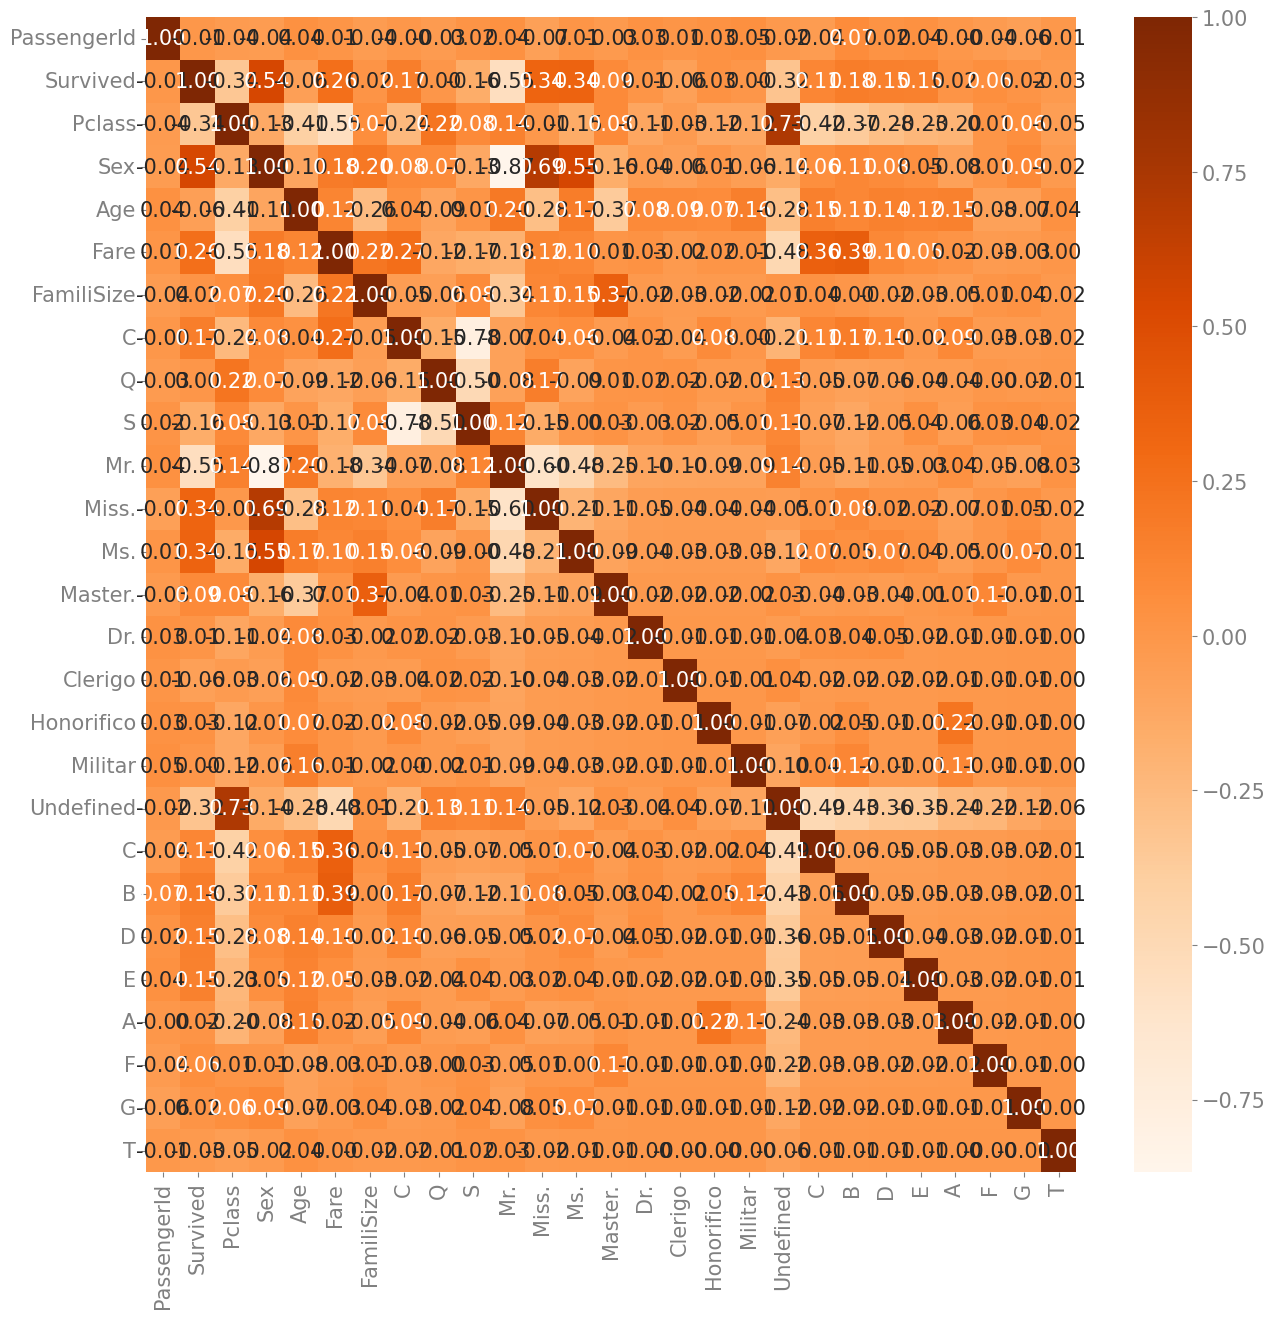

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(data_training.corr(), annot=True, cmap='Oranges', fmt='.2f')


* Removendo colunas que possuiem muitos valores distintos e seus tipos não são numericos.

In [48]:
# selecionando todas as colunas que os tipos são diferentes de numericos e removendo
index_numbers_train = data_training.select_dtypes(include=['number']).columns
data_training_bin = data_training[index_numbers_train]

# selecionando todas as colunas que o tipos são diferentes de numeric e removendo
index_numbers_test = data_test.select_dtypes(include=['number']).columns
data_test_bin = data_test[index_numbers_test]

# verificando as colunas são as mesmas após a remoção
data_training_bin.columns.difference(data_test_bin.columns)

Index(['Survived'], dtype='object')

In [49]:
data_test_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   FamiliSize   418 non-null    int64  
 6   C            418 non-null    float64
 7   C            418 non-null    float64
 8   Q            418 non-null    float64
 9   S            418 non-null    float64
 10  Mr.          418 non-null    float64
 11  Miss.        418 non-null    float64
 12  Ms.          418 non-null    float64
 13  Master.      418 non-null    float64
 14  Dr.          418 non-null    float64
 15  Clerigo      418 non-null    float64
 16  Honorifico   418 non-null    float64
 17  Militar      418 non-null    float64
 18  Undefined    418 non-null    float64
 19  C       

In [50]:
types = data_test_bin.dtypes
types2 = data_training_bin.dtypes

types.index.difference(types2.index)

Index([], dtype='object')

In [51]:
data_training_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   FamiliSize   891 non-null    int64  
 7   C            891 non-null    float64
 8   C            891 non-null    float64
 9   Q            891 non-null    float64
 10  S            891 non-null    float64
 11  Mr.          891 non-null    float64
 12  Miss.        891 non-null    float64
 13  Ms.          891 non-null    float64
 14  Master.      891 non-null    float64
 15  Dr.          891 non-null    float64
 16  Clerigo      891 non-null    float64
 17  Honorifico   891 non-null    float64
 18  Militar      891 non-null    float64
 19  Undefine

### Agora podemos treinar nosso modelo já que todos as colunas são numericas e não existe nenhum vaor null
* Separandos o vetor de treino e teste

In [52]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import random

random.randrange(10, 40) / 100

training_y = np.array(data_training_bin['Survived'])

training_x = np.array(data_training_bin.drop(columns=['Survived', 'PassengerId']))

test_x = np.array(data_test_bin.drop(columns=['PassengerId']))

teste_target = PD.read_csv("gender_submission.csv")

teste_y = np.array(teste_target['Survived'])

data_test_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   FamiliSize   418 non-null    int64  
 6   C            418 non-null    float64
 7   C            418 non-null    float64
 8   Q            418 non-null    float64
 9   S            418 non-null    float64
 10  Mr.          418 non-null    float64
 11  Miss.        418 non-null    float64
 12  Ms.          418 non-null    float64
 13  Master.      418 non-null    float64
 14  Dr.          418 non-null    float64
 15  Clerigo      418 non-null    float64
 16  Honorifico   418 non-null    float64
 17  Militar      418 non-null    float64
 18  Undefined    418 non-null    float64
 19  C       

* Vamos treinar nossos modelos vamos começar com arvores de desisão

In [57]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Criando um objeto DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Treinando o classificador
clf.fit(training_x, training_y)

# Fazendo previsões no conjunto de teste
y_tree = clf.predict(test_x)

# Avaliando a precisão das previsões
accuracy = accuracy_score(teste_y, y_tree)
print("Acurácia:", accuracy)

Acurácia: 0.7870813397129187


In [54]:
confusion_matrix(teste_y, y_tree)

array([[213,  53],
       [ 34, 118]])

In [1589]:
tree = PD.Series(y_tree, index=teste_target['PassengerId'], name='Survived')

tree.to_csv("rfc.csv")

* Agora vamos ver o resultado em uma Floresta aletória.

In [73]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_leaf_nodes=16, random_state=42)

RFC.fit(training_x, training_y)

y_rfc = RFC.predict(test_x)

accuracy = accuracy_score(teste_y, y_rfc)

print("Acurácia:", accuracy)

Acurácia: 0.9258373205741627


In [74]:
confusion_matrix(teste_y, y_rfc)

array([[249,  17],
       [ 14, 138]])

In [75]:
print(f'Precisão:{precision_score(teste_y, y_rfc)} | Revocação: {recall_score(teste_y, y_rfc)} | F1: {f1_score(teste_y, y_rfc)}')

Precisão:0.8903225806451613 | Revocação: 0.9078947368421053 | F1: 0.8990228013029316


In [76]:
saida_rfc = PD.Series(y_rfc, index=teste_target['PassengerId'], name='Survived')

saida_rfc.to_csv("rfc.csv")

* Testando Regressão logistica.

In [58]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state=42)

log_clf.fit(training_x, training_y)

y_log_clf = log_clf.predict(test_x)

accuracy = accuracy_score(teste_y, y_log_clf)

print('Accuracy: ', accuracy)

Accuracy:  0.9282296650717703


/home/maycon/IC-RedesDomesticas/.env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
confusion_matrix(teste_y, y_log_clf)

array([[243,  23],
       [  7, 145]])

In [1596]:
print(f'Precisão:{precision_score(teste_y, y_log_clf)} | Revocação: {recall_score(teste_y, y_log_clf)} | F1: {f1_score(teste_y, y_log_clf)}')

Precisão:0.8630952380952381 | Revocação: 0.9539473684210527 | F1: 0.90625


In [1597]:
regLin = pd.Series(y_log_clf, index=teste_target['PassengerId'], name='Survived')

regLin.to_csv("logLin.csv")

In [1598]:
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=2)

KM.fit(training_x, training_y)

y_Kmeans = KM.predict(test_x)

accuracy = accuracy_score(teste_y, y_Kmeans)

print("Accuracy: ", accuracy)

/home/maycon/IC-RedesDomesticas/.env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy:  0.34688995215311


In [1599]:
confusion_matrix(teste_y, y_Kmeans)

array([[ 12, 254],
       [ 19, 133]])

In [1600]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=6,
    bootstrap=True,
    n_jobs=-1
)


bag_clf.fit(training_x, training_y)

y_bag = bag_clf.predict(test_x)

accuracy = accuracy_score(teste_y, y_bag)

print("Accuracy: ", accuracy)

Accuracy:  0.8636363636363636


In [1601]:
confusion_matrix(teste_y, y_bag)

array([[264,   2],
       [ 55,  97]])

In [1602]:
bag = pd.Series(y_bag, index=teste_target['PassengerId'], name='Survived')

bag.to_csv("bag.csv")

In [1603]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(training_x, training_y)

y_pre_knn = KNN.predict(test_x)

accuracy = accuracy_score(teste_y, y_pre_knn)

print("acurácia: ", accuracy)

acurácia:  0.6866028708133971


In [1604]:
confusion_matrix(teste_y, y_pre_knn)

array([[200,  66],
       [ 65,  87]])

In [1605]:
erros = teste_target

erros['y_Tree'] =  y_tree
erros['y_RandomForestClf'] = y_rfc
erros['y_LogisticReqresion'] = y_log_clf
erros['y_BaggingClassifier'] = y_bag
erros['y_KNN'] = y_pre_knn
erros['y_kmeans'] = y_Kmeans

tests = pd.read_csv('./test.csv')

ret = erros[erros['y_RandomForestClf'] != erros['Survived']]

erros_RFC = tests[tests['PassengerId'].isin(ret['PassengerId'])]

erros_RFC.to_csv("erros.csv")

erros_RFC.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
80,972,3,"Boulos, Master. Akar",male,6.0,1,1,2678,15.2458,NaN,C
89,981,2,"Wells, Master. Ralph Lester",male,2.0,1,1,29103,23.0000,NaN,S
131,1023,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C
132,1024,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S


In [1606]:
data_training_bin

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamiliSize,C,C,Q,...,Undefined,C,C,B,D,E,A,F,G,T
0,1,0,3,0,22.0,7.2500,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,1,38.0,71.2833,1,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,1,26.0,7.9250,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,1,35.0,53.1000,1,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,0,35.0,8.0500,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,13.0000,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,888,1,1,1,19.0,30.0000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,889,0,3,1,21.5,23.4500,3,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,890,1,1,0,26.0,30.0000,0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
